In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# importing data set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 2 - Titles/title-dataset.csv")
# observing
df.head()

,Title,Intervention Area
0,"""Aarogya Setu"": The mobile application that mo...",Digital Information Services
1,"""I'm Not against Online Teaching, but What abo...",Policy & Regulation or Digital Services
2,"""What is the best method of family planning fo...",Digital Information Services
3,2018 Mobile Industry Impact Report: Sustainabl...,Digital Infrastructure Development
4,26 Recommendations on Content Governance: A Gu...,Cybersecurity


In [4]:
# lowercasing
df["Title"] = df["Title"].str.lower()

In [5]:
# remove punctuations

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Title"] = df["Title"].apply(lambda text: remove_punctuation(text))

In [6]:
# remove numbers

def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)

df["Title"] = df["Title"].apply(lambda text: remove_numbers(text))

In [7]:
# remove non alphabetic 
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

df["Title"] = df["Title"].apply(lambda text: remove_non_alpha(text))

In [8]:
# remove extra white space
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

df["Title"] = df["Title"].apply(lambda text: remove_extra_whitespaces(text))

In [9]:
# remove one letter word such as e a l
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

df["Title"] = df["Title"].apply(lambda text: remove_single_letter_words(text))

In [10]:
# check if there are duplicates
df.duplicated(subset=['Title']).any() #no duplicates

True

In [11]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['Title'],keep="first")

# **EDA**

In [12]:
import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot

In [13]:
# Count the number of items per group
group_counts = df.groupby("Intervention Area").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='Intervention Area', y='Title',color="Intervention Area")

# Show the chart
fig.show()

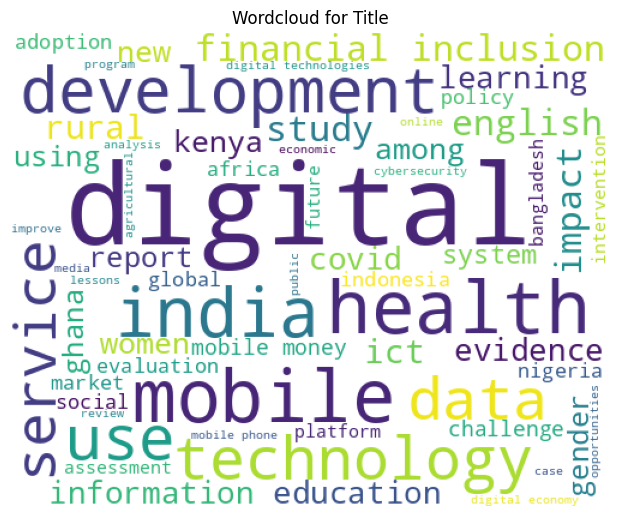

In [14]:
# word cloud to check the overall spread of words

all_words = '' 

# to extract most common words
for arg in df["Title"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for Title") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

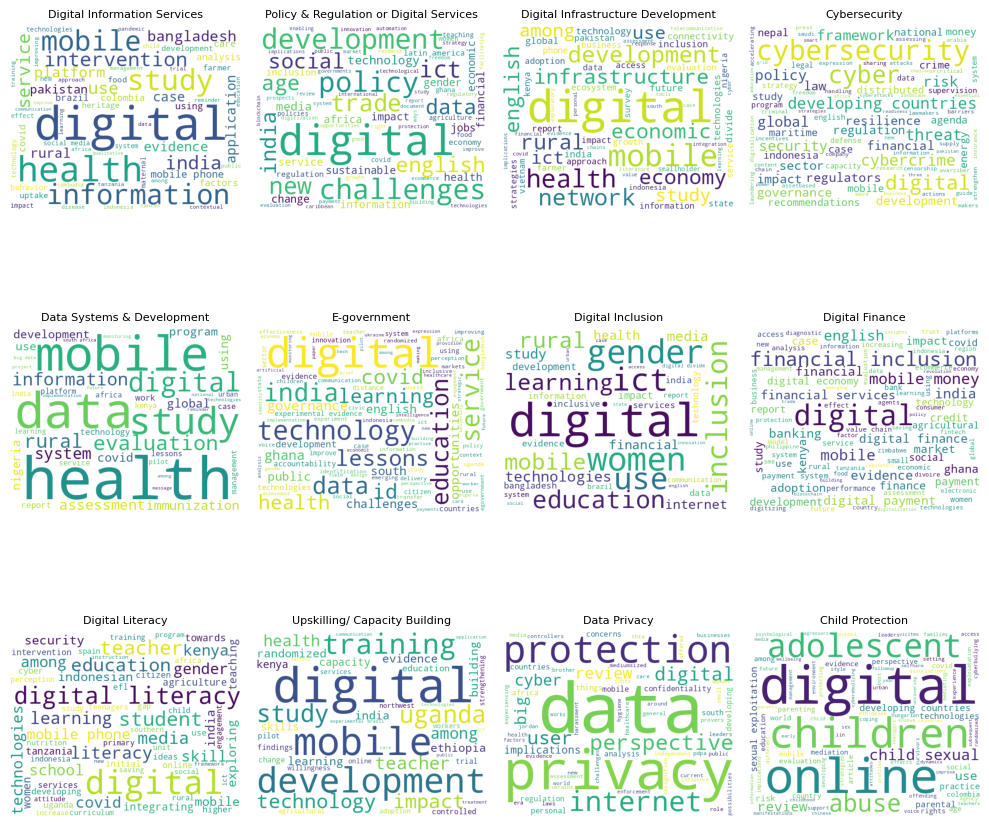

In [15]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['Intervention Area'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['Intervention Area'] == class_name]['Title'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                #colormap="ocean",
                min_font_size = 10).generate(class_text) 
    # Plot the wordcloud
    axs[i].imshow(wordcloud) 
    axs[i].set_title(f"{class_name}",fontsize=8) 
    axs[i].axis("off") 
fig.tight_layout()
plt.show()

In [ ]:
# preprocessing 

import re #Regular expressions
import nltk #NLP library
import spacy
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
countries=['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua', 'argentina', 
           'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 
           'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia', 
           'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina', 'burundi', 'cambodia', 'cameroon', 
           'canada', 'cape', 'central', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo', 
           'costa', 'croatia', 'cuba', 'cyprus', 'czech', 'denmark', 'djibouti', 'dominica', 
           'dominican', 'east', 'ecuador', 'egypt', 'el', 'equatorial', 'eritrea', 'estonia', 
           'eswatini', 'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'gambia', 'georgia', 
           'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guyana', 'haiti', 
           'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 
           'israel', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 
           'korea', 'kosovo', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 
           'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'madagascar', 'malawi', 
           'malaysia', 'maldives', 'mali', 'malta', 'marshall', 'mauritania', 'mauritius', 
           'mexico', 'micronesia', 'moldova', 'monaco', 'mongolia', 'montenegro', 'morocco', 
           'mozambique', 'myanmar', 'namibia', 'nauru', 'nepal', 'netherlands', 'new', 'nicaragua', 
           'niger', 'nigeria', 'north', 'north', 'macedonia', 'norway', 'oman', 'pakistan', 'palau', 
           'panama', 'papua', 'paraguay', 'peru', 'philippines', 'poland', 'portugal', 'qatar', 
           'romania', 'russia', 'rwanda', 'saint', 'samoa', 'san', 'sao', 'senegal', 'serbia', 
           'seychelles', 'sierra', 'singapore', 'slovakia', 'slovenia', 'solomon', 'somalia', 
           'south', 'south', 'spain', 'sri', 'sudan', 'suriname', 'sweden', 'switzerland', 
           'syria', 'taiwan', 'tajikistan', 'tanzania', 'thailand', 'timor-leste', 'togo', 
           'tonga', 'trinidad', 'tunisia', 'turkey', 'turkmenistan', 'tuvalu', 'uganda', 
           'ukraine', 'united', 'uruguay', 'uzbekistan', 'vanuatu', 'vatican', 'venezuela', 
           'vietnam', 'yemen', 'zambia', 'zimbabwe','digital','development']

In [19]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# Add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

# Add the additional stopwords to the STOPWORDS set
STOPWORDS = STOPWORDS.union(countries)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

df["Title"] = df["Title"].apply(lambda text: remove_stopwords(text))

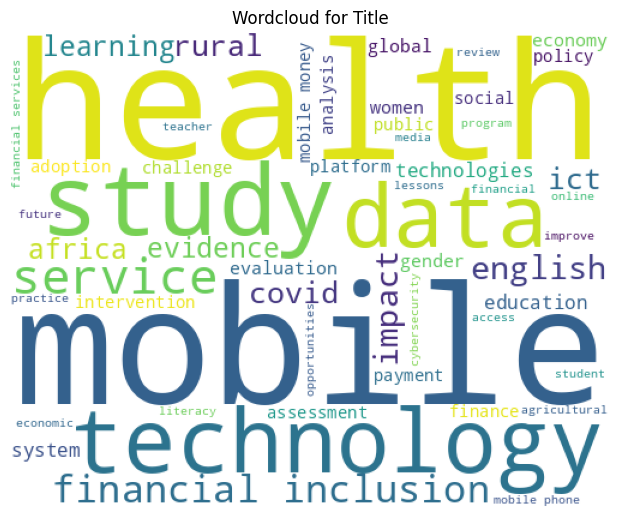

In [20]:
# word cloud to check the overall spread of words

all_words = '' 

# to extract most common words
for arg in df["Title"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for Title") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
# Convert filecalss into int values
classes={'Child Protection':0,'Cybersecurity':1,'Data Privacy':2,'Data Systems & Development':3,
         'Digital Finance':4,'Digital Inclusion':5,'Digital Information Services':6,
         'Digital Infrastructure Development':7,'Digital Literacy':8,
         'Policy & Regulation or Digital Services':9,'E-government':10,'Upskilling/ Capacity Building':11
         }
# map the filecalss values
df['classes']=df['Intervention Area'].map(classes)

In [22]:
# drop the fileclass axis
df.drop(['Intervention Area'], axis=1,inplace=True)

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [24]:
# lemmatisation

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["Title"] = df["Title"].apply(lambda text: lemmatize_words(text))
df.head()

,Title,classes
0,aarogya setu mobile application monitor mitiga...,6
1,online teach ict post covid,9
2,best method family plan text mining analysis m...,6
3,mobile industry impact sustainable goal,7
4,recommendation governance guide lawmaker regul...,1


In [25]:
# remove stopwords once again to get rid of any
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Title"] = df["Title"].apply(lambda text: remove_stopwords(text))

In [27]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Research/preprocessed_title.csv",index=True)